In [77]:
!pip install chess

In [78]:
from google.colab import drive

import chess.pgn
import numpy as np

import pandas as pd

import os

import matplotlib.pyplot as plt
import seaborn as sns

import networkx as nx
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score
from collections import Counter

In [79]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
df_features_posotional = pd.read_csv('/content/drive/MyDrive/database_positional.csv', delimiter='\t')
df_features_traking = pd.read_csv('/content/drive/MyDrive/database_traking.csv', delimiter='\t')
df_shanon = pd.read_csv('/content/drive/MyDrive/database_shanon.csv', delimiter='\t')

In [81]:
df_features_posotional.drop_duplicates()

0_0       0_1       0_2       0_3       0_4       0_5       0_6  \
0     2.952387  2.952387  2.321072  2.321072  2.152389  2.152389  1.741066   
1     2.952387  2.952387  2.321072  2.321072  2.152389  2.152389  1.741066   
2     2.952387  2.952387  2.321072  2.321072  2.152389  2.152389  1.741066   
3     2.952387  2.952387  2.321072  2.321072  2.152389  2.152389  1.741066   
4     2.952387  2.952387  2.321072  2.321072  2.152389  2.152389  1.741066   
...        ...       ...       ...       ...       ...       ...       ...   
1995  2.952387  2.952387  2.321072  2.321072  2.152389  2.152389  1.741066   
1996  2.952387  2.952387  2.321072  2.321072  2.152389  2.152389  1.741066   
1997  2.952387  2.952387  2.321072  2.321072  2.152389  2.152389  1.741066   
1998  2.952387  2.952387  2.321072  2.321072  2.152389  2.152389  1.741066   
1999  2.952387  2.952387  2.321072  2.321072  2.152389  2.152389  1.741066   

           0_7       0_8       0_9  ...  304_18  304_19  304_20  304_21  \
0     1.741066  1.732051  1.732051  ...    59.0     2.0    59.0     5.0   
1     1.741066  1.732051  1.732051  ...    53.0     2.0    53.0     2.0   
2     1.741066  1.732051  1.732051  ...     2.0     2.0    53.0     7.0   
3     1.741066  1.732051  1.732051  ...    60.0     2.0    60.0     2.0   
4     1.741066  1.732051  1.732051  ...     2.0     2.0    43.0     2.0   
...        ...       ...       ...  ...     ...     ...     ...     ...   
1995  1.741066  1.732051  1.732051  ...    62.0     2.0    62.0     2.0   
1996  1.741066  1.732051  1.732051  ...    24.0     0.0    24.0     0.0   
1997  1.741066  1.732051  1.732051  ...     2.0     2.0    52.0     4.0   
1998  1.741066  1.732051  1.732051  ...    51.0     2.0    51.0     2.0   
1999  1.741066  1.732051  1.732051  ...    61.0     2.0    61.0     6.0   

      304_22  304_23     304_24    304_25    304_26  Result  
0       59.0    10.0  59.000000  3.333333  0.053128    True  
1       53.0     2.0  53.000000  2.000000  0.027931   False  
2       58.0     9.0  19.333333  4.500000  0.084156    True  
3       60.0     2.0  60.000000  2.000000  0.039633   False  
4       45.0     2.0  22.500000  2.000000  0.050003    True  
...      ...     ...        ...       ...       ...     ...  
1995    62.0     2.0  62.000000  2.000000  0.114839    True  
1996    24.0     0.0  24.000000  0.000000  0.028708    True  
1997    54.0     6.0  27.000000  3.000000  0.097920    True  
1998    51.0     2.0  51.000000  2.000000  0.044579    True  
1999    61.0     8.0  61.000000  4.000000  0.098694   False  

[1959 rows x 8236 columns]

In [82]:
df_features_traking.drop_duplicates()

0_0  0_1           0_2           0_3           0_4           0_5  \
0     1.0  1.0  9.992007e-17  9.992007e-17  9.992007e-17  9.992007e-17   
1     1.0  1.0  9.992007e-17  9.992007e-17  9.992007e-17  9.992007e-17   
2     1.0  1.0  9.992007e-17  9.992007e-17  9.992007e-17  9.992007e-17   
3     1.0  1.0  9.992007e-17  9.992007e-17  9.992007e-17  9.992007e-17   
4     1.0  1.0  9.992007e-17  9.992007e-17  9.992007e-17  9.992007e-17   
...   ...  ...           ...           ...           ...           ...   
1995  1.0  1.0  9.992007e-17  9.992007e-17  9.992007e-17  9.992007e-17   
1996  1.0  1.0  9.992007e-17  9.992007e-17  9.992007e-17  9.992007e-17   
1997  1.0  1.0  9.992007e-17  9.992007e-17  9.992007e-17  9.992007e-17   
1998  1.0  1.0  9.992007e-17  9.992007e-17  9.992007e-17  9.992007e-17   
1999  1.0  1.0  9.992007e-17  9.992007e-17  9.992007e-17  9.992007e-17   

               0_6           0_7           0_8           0_9  ...  304_18  \
0     9.992007e-17  9.992007e-17  9.992007e-17  9.992007e-17  ...     2.0   
1     9.992007e-17  9.992007e-17  9.992007e-17  9.992007e-17  ...    59.0   
2     9.992007e-17  9.992007e-17  9.992007e-17  9.992007e-17  ...    53.0   
3     9.992007e-17  9.992007e-17  9.992007e-17  9.992007e-17  ...    51.0   
4     9.992007e-17  9.992007e-17  9.992007e-17  9.992007e-17  ...     3.0   
...            ...           ...           ...           ...  ...     ...   
1995  9.992007e-17  9.992007e-17  9.992007e-17  9.992007e-17  ...     4.0   
1996  9.992007e-17  9.992007e-17  9.992007e-17  9.992007e-17  ...    64.0   
1997  9.992007e-17  9.992007e-17  9.992007e-17  9.992007e-17  ...     3.0   
1998  9.992007e-17  9.992007e-17  9.992007e-17  9.992007e-17  ...    61.0   
1999  9.992007e-17  9.992007e-17  9.992007e-17  9.992007e-17  ...     2.0   

      304_19  304_20  304_21  304_22  304_23     304_24  304_25    304_26  \
0       15.0    34.0    15.0    36.0    15.0  18.000000    15.0  0.000000   
1       46.0    59.0    46.0    59.0    46.0  59.000000    46.0  0.089813   
2       41.0    53.0    41.0    53.0    41.0  53.000000    41.0  0.070372   
3        2.0    51.0    19.0    51.0    21.0  51.000000    10.5  0.028086   
4        2.0    54.0    38.0    57.0    40.0  28.500000    20.0  0.070266   
...      ...     ...     ...     ...     ...        ...     ...       ...   
1995     2.0    49.0     2.0    53.0     2.0  26.500000     2.0  0.010677   
1996    61.0    64.0    61.0    64.0    61.0  64.000000    61.0  0.093669   
1997     2.0    48.0    20.0    51.0    22.0  25.500000    11.0  0.026549   
1998    58.0    61.0    58.0    61.0    58.0  61.000000    58.0  0.186571   
1999     2.0    41.0    12.0    47.0    14.0  15.666667     7.0  0.013197   

      Result  
0       True  
1      False  
2       True  
3      False  
4       True  
...      ...  
1995    True  
1996    True  
1997    True  
1998    True  
1999   False  

[1959 rows x 8236 columns]

In [83]:
df_shanon.drop_duplicates()

0    1    2    3    4    5    6    7    8    9  ...   296   297   298  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  -3.3  -8.2  -3.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  -1.1  -0.4  -1.3   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  -1.6  -1.7   2.7   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  -1.1   3.3  -1.2   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   1.7   2.3   1.4   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
1995  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   1.3  -1.5   1.6   
1996  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   4.4   5.1   4.6   
1997  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   6.9   4.0   8.0   
1998  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   4.2   4.8   4.0   
1999  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -11.8 -10.6 -11.6   

       299   300   301   302   303   304  Result  
0     -4.8  -2.8  -7.2  -2.3 -13.2 -11.3    True  
1     -0.6  -5.0  -0.7  -7.2  -1.9  -1.0   False  
2      1.4   3.0  -1.2   2.0  -1.7   2.9    True  
3      6.1  -3.0   3.7  -2.9   5.2   2.3   False  
4      0.7  -0.7  -0.1  -0.6   0.6   1.2    True  
...    ...   ...   ...   ...   ...   ...     ...  
1995  -1.6   1.5   0.8   1.6  -2.0   2.6    True  
1996   5.1   4.6   5.7   3.9   4.3   2.6    True  
1997   7.8   8.1   7.8   8.6   7.9   8.8    True  
1998   4.8   5.1   3.2   3.6   3.2   3.7    True  
1999 -10.8 -11.8 -10.7 -14.2  -8.3 -20.0   False  

[1959 rows x 306 columns]

In [84]:
target = 'Result'
max_moves_number = 305
avg_moves_number = 92
persent_white_win = df_shanon[target].mean()
results_shanon = []
results_positional = []
avg_pred = []

In [85]:
df_features_posotional.index

RangeIndex(start=0, stop=2000, step=1)

In [86]:
df_pos_results = pd.DataFrame(columns = range(27))
# model = LogisticRegression()

for i in range(max_moves_number-1, 1, -1):
    model = LogisticRegression()
    vector = []
    for j in range(27):
        if i >= 7:
          df_model = pd.DataFrame(df_features_posotional.iloc[:, (i-7)*27+j:i*27:27])
          X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(df_model, df_features_posotional[target], test_size=0.2)
          model.fit(X_train_pos, y_train_pos)
          y_predicted = model.predict(X_test_pos)
        else:
          df_model = pd.DataFrame(df_features_posotional.iloc[:, 0+j:i*27:27])
          X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(df_model, df_features_posotional[target], test_size=0.2)
          model.fit(X_train_pos, y_train_pos)
          y_predicted = model.predict(X_test_pos)
        vector.append(accuracy_score(y_test_pos, y_predicted))
    df_pos_results.loc[max_moves_number-1-i] = vector
df_pos_results

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0       1       2       3       4       5       6       7       8   \
0    0.5850  0.5725  0.5800  0.5425  0.5550  0.5375  0.5375  0.5500  0.5475   
1    0.5675  0.5650  0.5300  0.5875  0.5775  0.5775  0.5850  0.5625  0.5550   
2    0.5925  0.5825  0.5900  0.5825  0.5825  0.5600  0.5375  0.5650  0.5975   
3    0.6075  0.5400  0.5850  0.5675  0.5175  0.5700  0.5300  0.5450  0.5650   
4    0.5725  0.5825  0.5375  0.5575  0.5650  0.5400  0.5800  0.5725  0.5850   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
298  0.5800  0.5375  0.5800  0.5700  0.5725  0.5850  0.6050  0.5550  0.5425   
299  0.5375  0.5725  0.5900  0.5825  0.5675  0.5550  0.5850  0.5725  0.5375   
300  0.5525  0.5800  0.5900  0.5675  0.5575  0.5600  0.5600  0.5700  0.5700   
301  0.5125  0.5325  0.5125  0.5950  0.5800  0.5575  0.5550  0.5950  0.5225   
302  0.5375  0.5800  0.5650  0.5550  0.5925  0.5675  0.5400  0.5800  0.5675   

         9   ...      17      18      19      20      21      22      23  \
0    0.5575  ...  0.5575  0.5800  0.5700  0.5550  0.5250  0.5875  0.5250   
1    0.5200  ...  0.5425  0.6050  0.5300  0.5375  0.5550  0.5550  0.5400   
2    0.5575  ...  0.5725  0.5650  0.5950  0.5500  0.5500  0.5800  0.5175   
3    0.5925  ...  0.5675  0.5600  0.5675  0.5725  0.6200  0.5875  0.5900   
4    0.5675  ...  0.5800  0.5875  0.5525  0.5825  0.5525  0.5525  0.5800   
..      ...  ...     ...     ...     ...     ...     ...     ...     ...   
298  0.5375  ...  0.5575  0.5625  0.5550  0.5950  0.5275  0.5575  0.5850   
299  0.5450  ...  0.5825  0.5825  0.5800  0.5600  0.5500  0.5225  0.5625   
300  0.5375  ...  0.5650  0.5925  0.5625  0.5450  0.5325  0.5750  0.5475   
301  0.5800  ...  0.5850  0.5750  0.5475  0.5400  0.5750  0.5750  0.5325   
302  0.5675  ...  0.5525  0.5625  0.5850  0.5700  0.5875  0.5550  0.5125   

         24      25      26  
0    0.5725  0.5700  0.5550  
1    0.5775  0.5400  0.5575  
2    0.5375  0.5900  0.5650  
3    0.5875  0.5650  0.5600  
4    0.5425  0.5150  0.5650  
..      ...     ...     ...  
298  0.6100  0.5975  0.5825  
299  0.5475  0.5250  0.5625  
300  0.5750  0.5775  0.5525  
301  0.5700  0.6125  0.5875  
302  0.5875  0.5800  0.5825  

[303 rows x 27 columns]

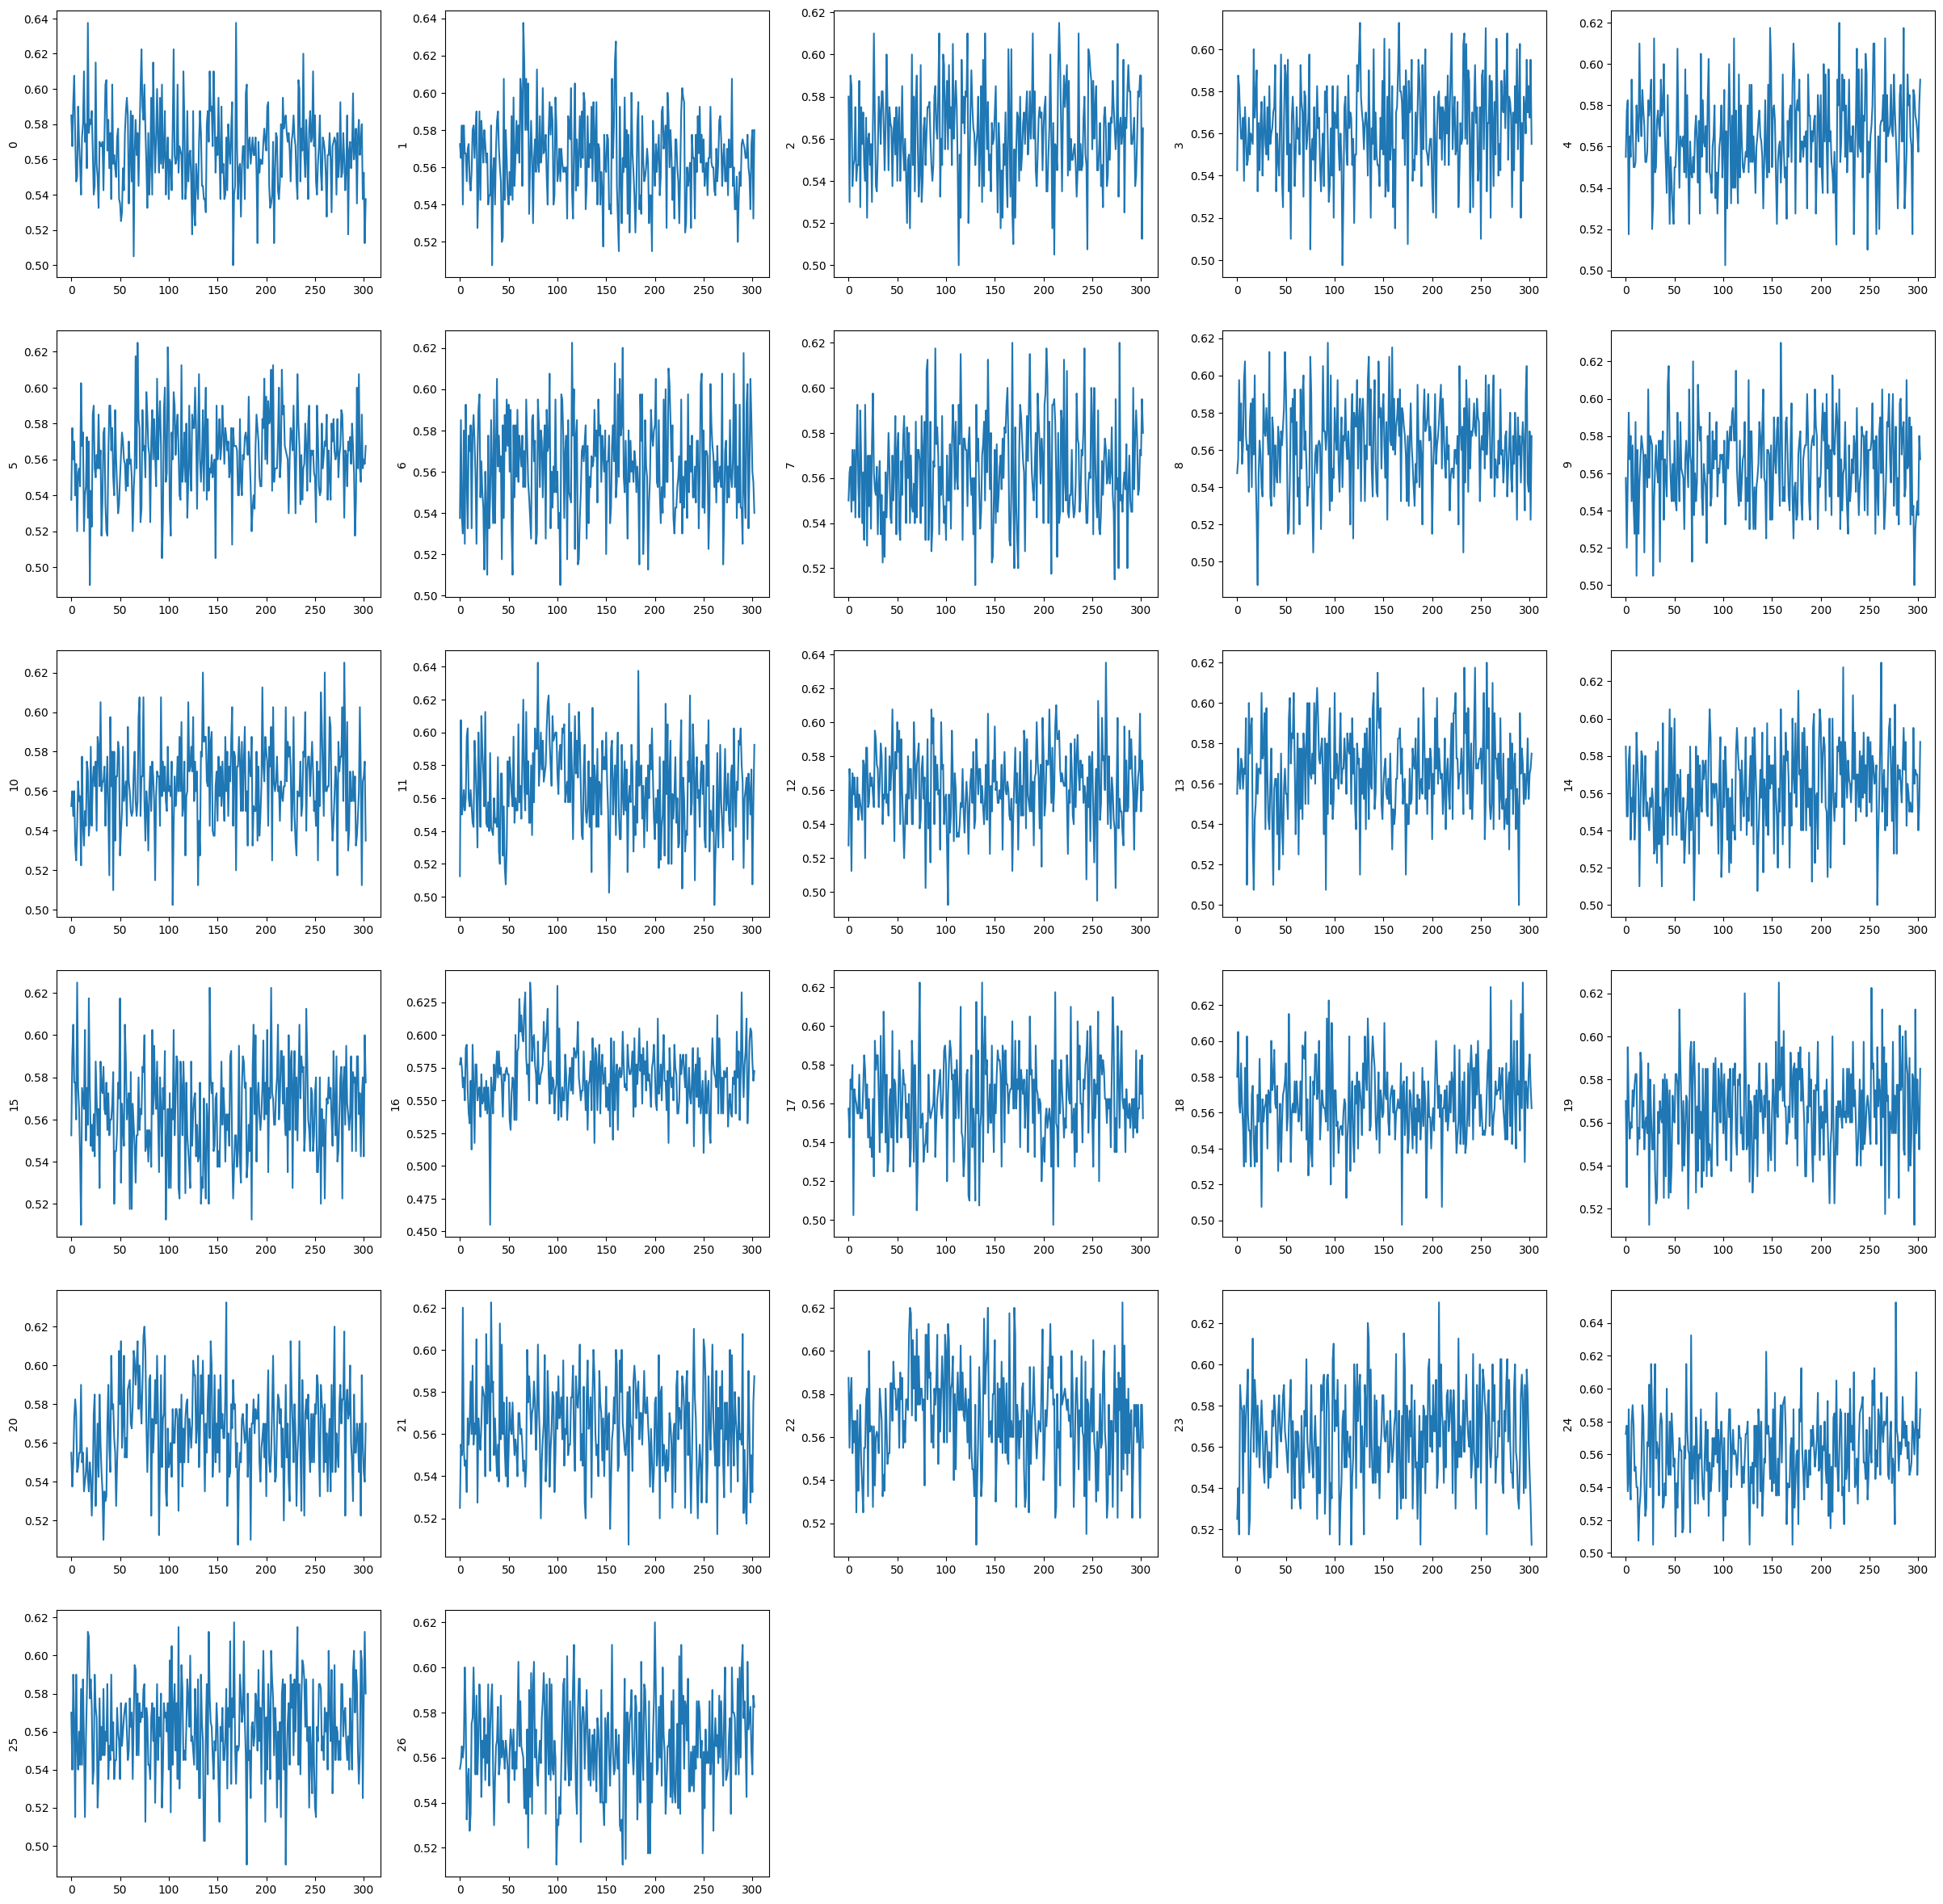

In [87]:
plt.figure(figsize=(30, 30))
for i in range(27):
  plt.subplot(6, 5, i+1)
  sns.lineplot(df_pos_results.iloc[:, i])
plt.show()

In [88]:
df_pos_results.describe()

0           1           2           3           4           5   \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.565239    0.564901    0.562005    0.562690    0.564604    0.562805   
std      0.022653    0.021623    0.022038    0.021911    0.022026    0.022263   
min      0.500000    0.507500    0.500000    0.497500    0.502500    0.490000   
25%      0.550000    0.550000    0.547500    0.548750    0.550000    0.547500   
50%      0.565000    0.565000    0.562500    0.562500    0.562500    0.562500   
75%      0.577500    0.580000    0.575000    0.577500    0.580000    0.577500   
max      0.637500    0.637500    0.615000    0.612500    0.620000    0.625000   

               6           7           8           9   ...          17  \
count  303.000000  303.000000  303.000000  303.000000  ...  303.000000   
mean     0.562995    0.563589    0.563127    0.564802  ...    0.561914   
std      0.023624    0.022054    0.022825    0.022628  ...    0.022193   
min      0.505000    0.512500    0.487500    0.500000  ...    0.497500   
25%      0.547500    0.547500    0.547500    0.547500  ...    0.547500   
50%      0.562500    0.562500    0.562500    0.565000  ...    0.562500   
75%      0.580000    0.577500    0.577500    0.580000  ...    0.577500   
max      0.622500    0.620000    0.617500    0.630000  ...    0.622500   

               18          19          20          21          22          23  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.565693    0.565487    0.566188    0.563424    0.569208    0.565512   
std      0.021293    0.020584    0.022931    0.021307    0.022453    0.022576   
min      0.497500    0.512500    0.507500    0.507500    0.510000    0.512500   
25%      0.552500    0.552500    0.550000    0.550000    0.555000    0.550000   
50%      0.565000    0.565000    0.567500    0.562500    0.572500    0.567500   
75%      0.577500    0.580000    0.580000    0.577500    0.582500    0.582500   
max      0.632500    0.625000    0.632500    0.622500    0.622500    0.630000   

               24          25          26  
count  303.000000  303.000000  303.000000  
mean     0.561114    0.561782    0.565380  
std      0.024141    0.023604    0.020729  
min      0.505000    0.490000    0.512500  
25%      0.543750    0.545000    0.552500  
50%      0.562500    0.562500    0.565000  
75%      0.577500    0.577500    0.580000  
max      0.652500    0.617500    0.620000  

[8 rows x 27 columns]

from matplotlib import pyplot as plt
_df_0[0].plot(kind='hist', bins=20, title=0)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1[1].plot(kind='hist', bins=20, title=1)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2[2].plot(kind='hist', bins=20, title=2)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3[3].plot(kind='hist', bins=20, title=3)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x=0, y=1, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x=1, y=2, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x=2, y=3, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x=3, y=4, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8[0].plot(kind='line', figsize=(8, 4), title=0)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9[1].plot(kind='line', figsize=(8, 4), title=1)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10[2].plot(kind='line', figsize=(8, 4), title=2)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11[3].plot(kind='line', figsize=(8, 4), title=3)
plt.gca().spines[['top', 'right']].set_visible(False)

In [89]:
model = LogisticRegression()
for i in range(max_moves_number-1, 1, -1):
    if i >= 7:
        df_model = pd.DataFrame(df_shanon.iloc[:, i-7:i])
        X_train_shan, X_test_shan, y_train_shan, y_test_shan = train_test_split(df_model, df_shanon[target], test_size=0.2)
        model.fit(X_train_shan, y_train_shan)
        y_predicted = model.predict(X_test_shan)
    else:
        df_model = pd.DataFrame(df_shanon.iloc[:, 0:i])
        X_train_shan, X_test_shan, y_train_shan, y_test_shan = train_test_split(
            df_model,
            df_shanon[target], test_size=0.2)
        model.fit(X_train_shan, y_train_shan)
        y_predicted = model.predict(X_test_shan)
    # print(f"Test R2: {accuracy_score(y_test_shan, y_predicted)}")
    # print(Counter(y_predicted))
    # print((y_predicted).mean())
    avg_pred.append((y_predicted).mean())
    results_shanon.append(accuracy_score(y_test_shan, y_predicted))

In [90]:
model = LogisticRegression()
results_positional = []
for i in range(max_moves_number-1, 1, -1):
    if i >= 7:
        df_model = pd.DataFrame(df_features_posotional.iloc[:, (i-7)*27:i*27])
        X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(df_model, df_features_posotional[target], test_size=0.2)
        model.fit(X_train_pos, y_train_pos)
        y_predicted = model.predict(X_test_pos)
    else:
        df_model = pd.DataFrame(df_features_posotional.iloc[:, 0:i*27])
        X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(df_model, df_features_posotional[target], test_size=0.2)
        model.fit(X_train_pos, y_train_pos)
        y_predicted = model.predict(X_test_pos)
    # print(f"Test R2: {accuracy_score(y_test_shan, y_predicted)}")
    # print(Counter(y_predicted))
    # print((y_predicted).mean())
    results_positional.append(accuracy_score(y_test_pos, y_predicted))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

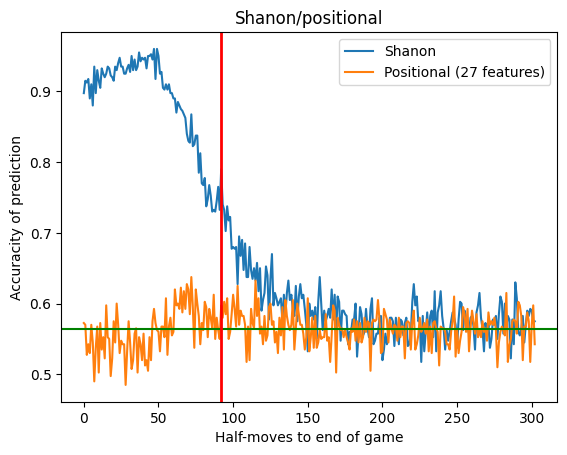

In [91]:
sns.lineplot(results_shanon, label = 'Shanon')
sns.lineplot(results_positional, label = 'Positional (27 features)')
plt.axhline(persent_white_win, label = 'Avg_guess', color = 'g')
plt.axvline(x=avg_moves_number, linewidth=2, color='r')
plt.title('Shanon/positional')
plt.xlabel('Half-moves to end of game')
plt.ylabel('Accuracity of prediction')
plt.show()


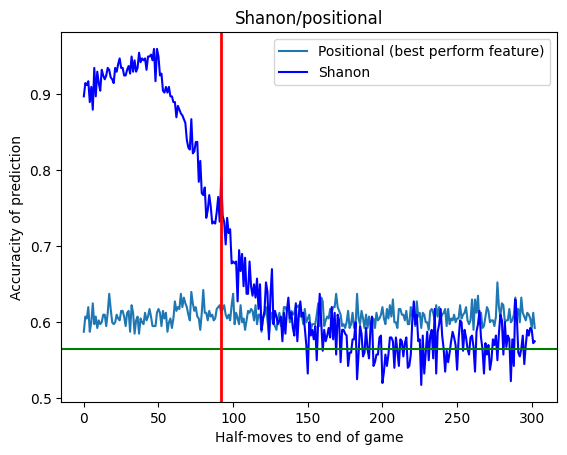

In [92]:
sns.lineplot(df_pos_results.max(axis=1), label='Positional (best perform feature)')
sns.lineplot(results_shanon, label = 'Shanon', color = 'b')
plt.axhline(persent_white_win, label = 'Avg_guess', color = 'g')
plt.axvline(x=avg_moves_number, linewidth=2, color='r')
plt.title('Shanon/positional')
plt.xlabel('Half-moves to end of game')
plt.ylabel('Accuracity of prediction')
plt.show()

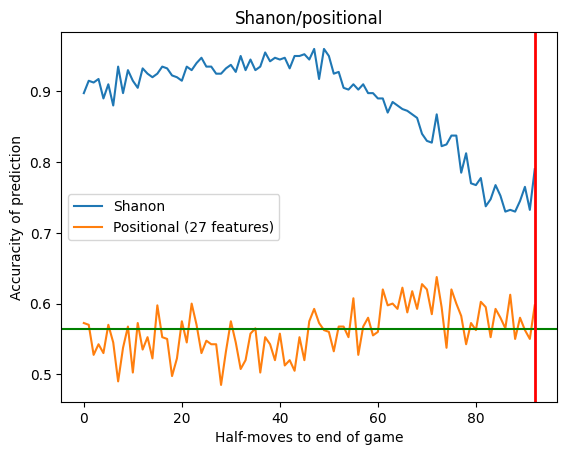

In [93]:
sns.lineplot(results_shanon[:93], label = 'Shanon')
sns.lineplot(results_positional[:93], label = 'Positional (27 features)')
plt.axhline(persent_white_win, label = 'Avg_guess', color = 'g')
plt.axvline(x=avg_moves_number, linewidth=2, color='r')
plt.title('Shanon/positional')
plt.xlabel('Half-moves to end of game')
plt.ylabel('Accuracity of prediction')
plt.show()

In [94]:
model = svm.SVC(kernel='poly')
results_shanon = []
for i in range(max_moves_number-1, 1, -1):
    if i >= 7:
        df_model = pd.DataFrame(df_shanon.iloc[:, i-7:i])
        X_train_shan, X_test_shan, y_train_shan, y_test_shan = train_test_split(df_model, df_shanon[target], test_size=0.2)
        model.fit(X_train_shan, y_train_shan)
        y_predicted = model.predict(X_test_shan)
    else:
        df_model = pd.DataFrame(df_shanon.iloc[:, 0:i])
        X_train_shan, X_test_shan, y_train_shan, y_test_shan = train_test_split(
            df_model,
            df_shanon[target], test_size=0.2)
        model.fit(X_train_shan, y_train_shan)
        y_predicted = model.predict(X_test_shan)
    # print(f"Test R2: {accuracy_score(y_test_shan, y_predicted)}")
    # print(Counter(y_predicted))
    # print((y_predicted).mean())

    results_shanon.append(accuracy_score(y_test_shan, y_predicted))

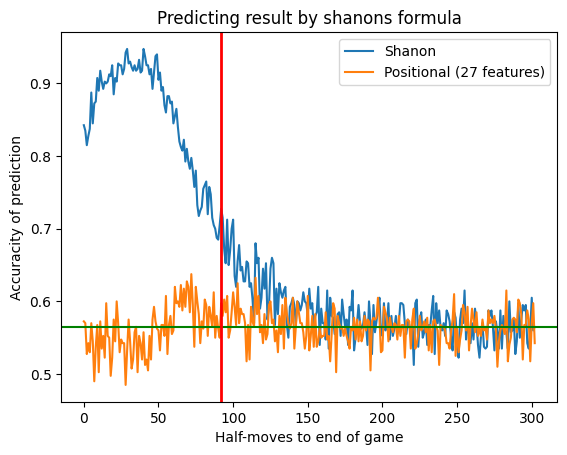

In [95]:
sns.lineplot(results_shanon, label = 'Shanon')
sns.lineplot(results_positional, label = 'Positional (27 features)')
plt.axhline(persent_white_win, label = 'Avg_guess', color = 'g')
plt.axvline(x=avg_moves_number, linewidth=2, color='r')
plt.title('Predicting result by shanons formula')
plt.xlabel('Half-moves to end of game')
plt.ylabel('Accuracity of prediction')
plt.show()


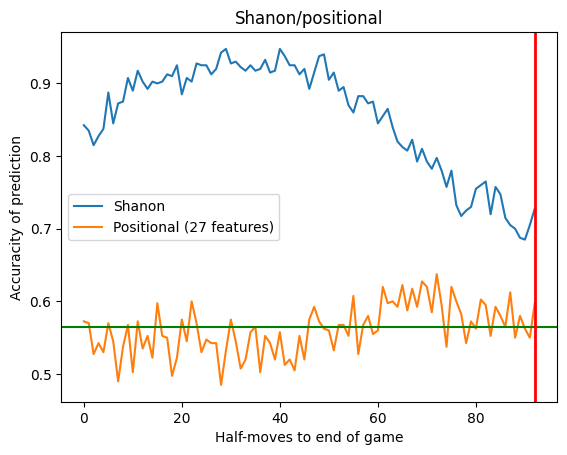

In [96]:
sns.lineplot(results_shanon[:93], label = 'Shanon')
sns.lineplot(results_positional[:93], label = 'Positional (27 features)')
plt.axhline(persent_white_win, label = 'Avg_guess', color = 'g')
plt.axvline(x=avg_moves_number, linewidth=2, color='r')
plt.title('Shanon/positional')
plt.xlabel('Half-moves to end of game')
plt.ylabel('Accuracity of prediction')
plt.show()

In [ ]:
df_trak_results = pd.DataFrame(columns = range(27))
# model = LogisticRegression()

for i in range(max_moves_number-1, 1, -1):
    model = svm.SVC(C=20)
    vector = []
    for j in range(27):
        if i >= 25:
          df_model = pd.DataFrame(df_features_traking.iloc[:, (i-25)*27+j:i*27:27])
          X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(df_model, df_features_traking[target], test_size=0.2)
          model.fit(X_train_pos, y_train_pos)
          y_predicted = model.predict(X_test_pos)
        else:
          df_model = pd.DataFrame(df_features_traking.iloc[:, 0+j:i*27:27])
          X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(df_model, df_features_traking[target], test_size=0.2)
          model.fit(X_train_pos, y_train_pos)
          y_predicted = model.predict(X_test_pos)
        vector.append(accuracy_score(y_test_pos, y_predicted))
    df_trak_results.loc[max_moves_number-1-i] = vector
df_trak_results

0       1       2       3       4       5       6       7       8   \
0    0.5525  0.5350  0.5225  0.5350  0.5200  0.5525  0.5550  0.5600  0.5425   
1    0.5700  0.5575  0.5600  0.5925  0.5325  0.5650  0.5925  0.5750  0.5575   
2    0.5400  0.5475  0.5850  0.5700  0.5700  0.5150  0.5650  0.5375  0.5650   
3    0.5750  0.5550  0.5475  0.5450  0.5900  0.5375  0.5525  0.5525  0.5575   
4    0.5825  0.5625  0.5650  0.5525  0.5075  0.5925  0.5875  0.5175  0.5300   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
298  0.5550  0.5825  0.5250  0.5750  0.5625  0.5675  0.5850  0.5450  0.5500   
299  0.5550  0.5525  0.6025  0.5650  0.5675  0.5925  0.5950  0.5800  0.5750   
300  0.5575  0.5325  0.5225  0.5975  0.5825  0.5650  0.5650  0.5625  0.5800   
301  0.5675  0.5450  0.5675  0.5600  0.5525  0.5575  0.5300  0.5800  0.5475   
302  0.5825  0.5725  0.5775  0.5550  0.5675  0.5525  0.5375  0.5450  0.5500   

         9   ...      17      18      19      20      21      22      23  \
0    0.5600  ...  0.5600  0.5500  0.5375  0.5300  0.5575  0.5750  0.5525   
1    0.5675  ...  0.5675  0.5350  0.5525  0.4950  0.5175  0.5775  0.5700   
2    0.6000  ...  0.4975  0.5675  0.5400  0.5725  0.5825  0.5750  0.5575   
3    0.5425  ...  0.5300  0.5400  0.5525  0.5550  0.5425  0.5250  0.5600   
4    0.5725  ...  0.5350  0.5725  0.5400  0.5300  0.5450  0.5200  0.5450   
..      ...  ...     ...     ...     ...     ...     ...     ...     ...   
298  0.5625  ...  0.5325  0.5400  0.5425  0.5900  0.5300  0.5750  0.5375   
299  0.5650  ...  0.5675  0.5750  0.5325  0.5675  0.5850  0.5650  0.5375   
300  0.5575  ...  0.5800  0.5575  0.5650  0.5800  0.5600  0.5575  0.5675   
301  0.5625  ...  0.5725  0.5400  0.5850  0.5825  0.5375  0.5775  0.5750   
302  0.5475  ...  0.5350  0.5275  0.5425  0.6150  0.5875  0.5300  0.5375   

         24      25      26  
0    0.4975  0.5475  0.5575  
1    0.5675  0.5350  0.5550  
2    0.5775  0.5650  0.5450  
3    0.5275  0.5425  0.5575  
4    0.5550  0.5925  0.5850  
..      ...     ...     ...  
298  0.5400  0.5550  0.5650  
299  0.5800  0.5600  0.5350  
300  0.5225  0.5800  0.5450  
301  0.5775  0.5175  0.5875  
302  0.5450  0.5825  0.5300  

[303 rows x 27 columns]

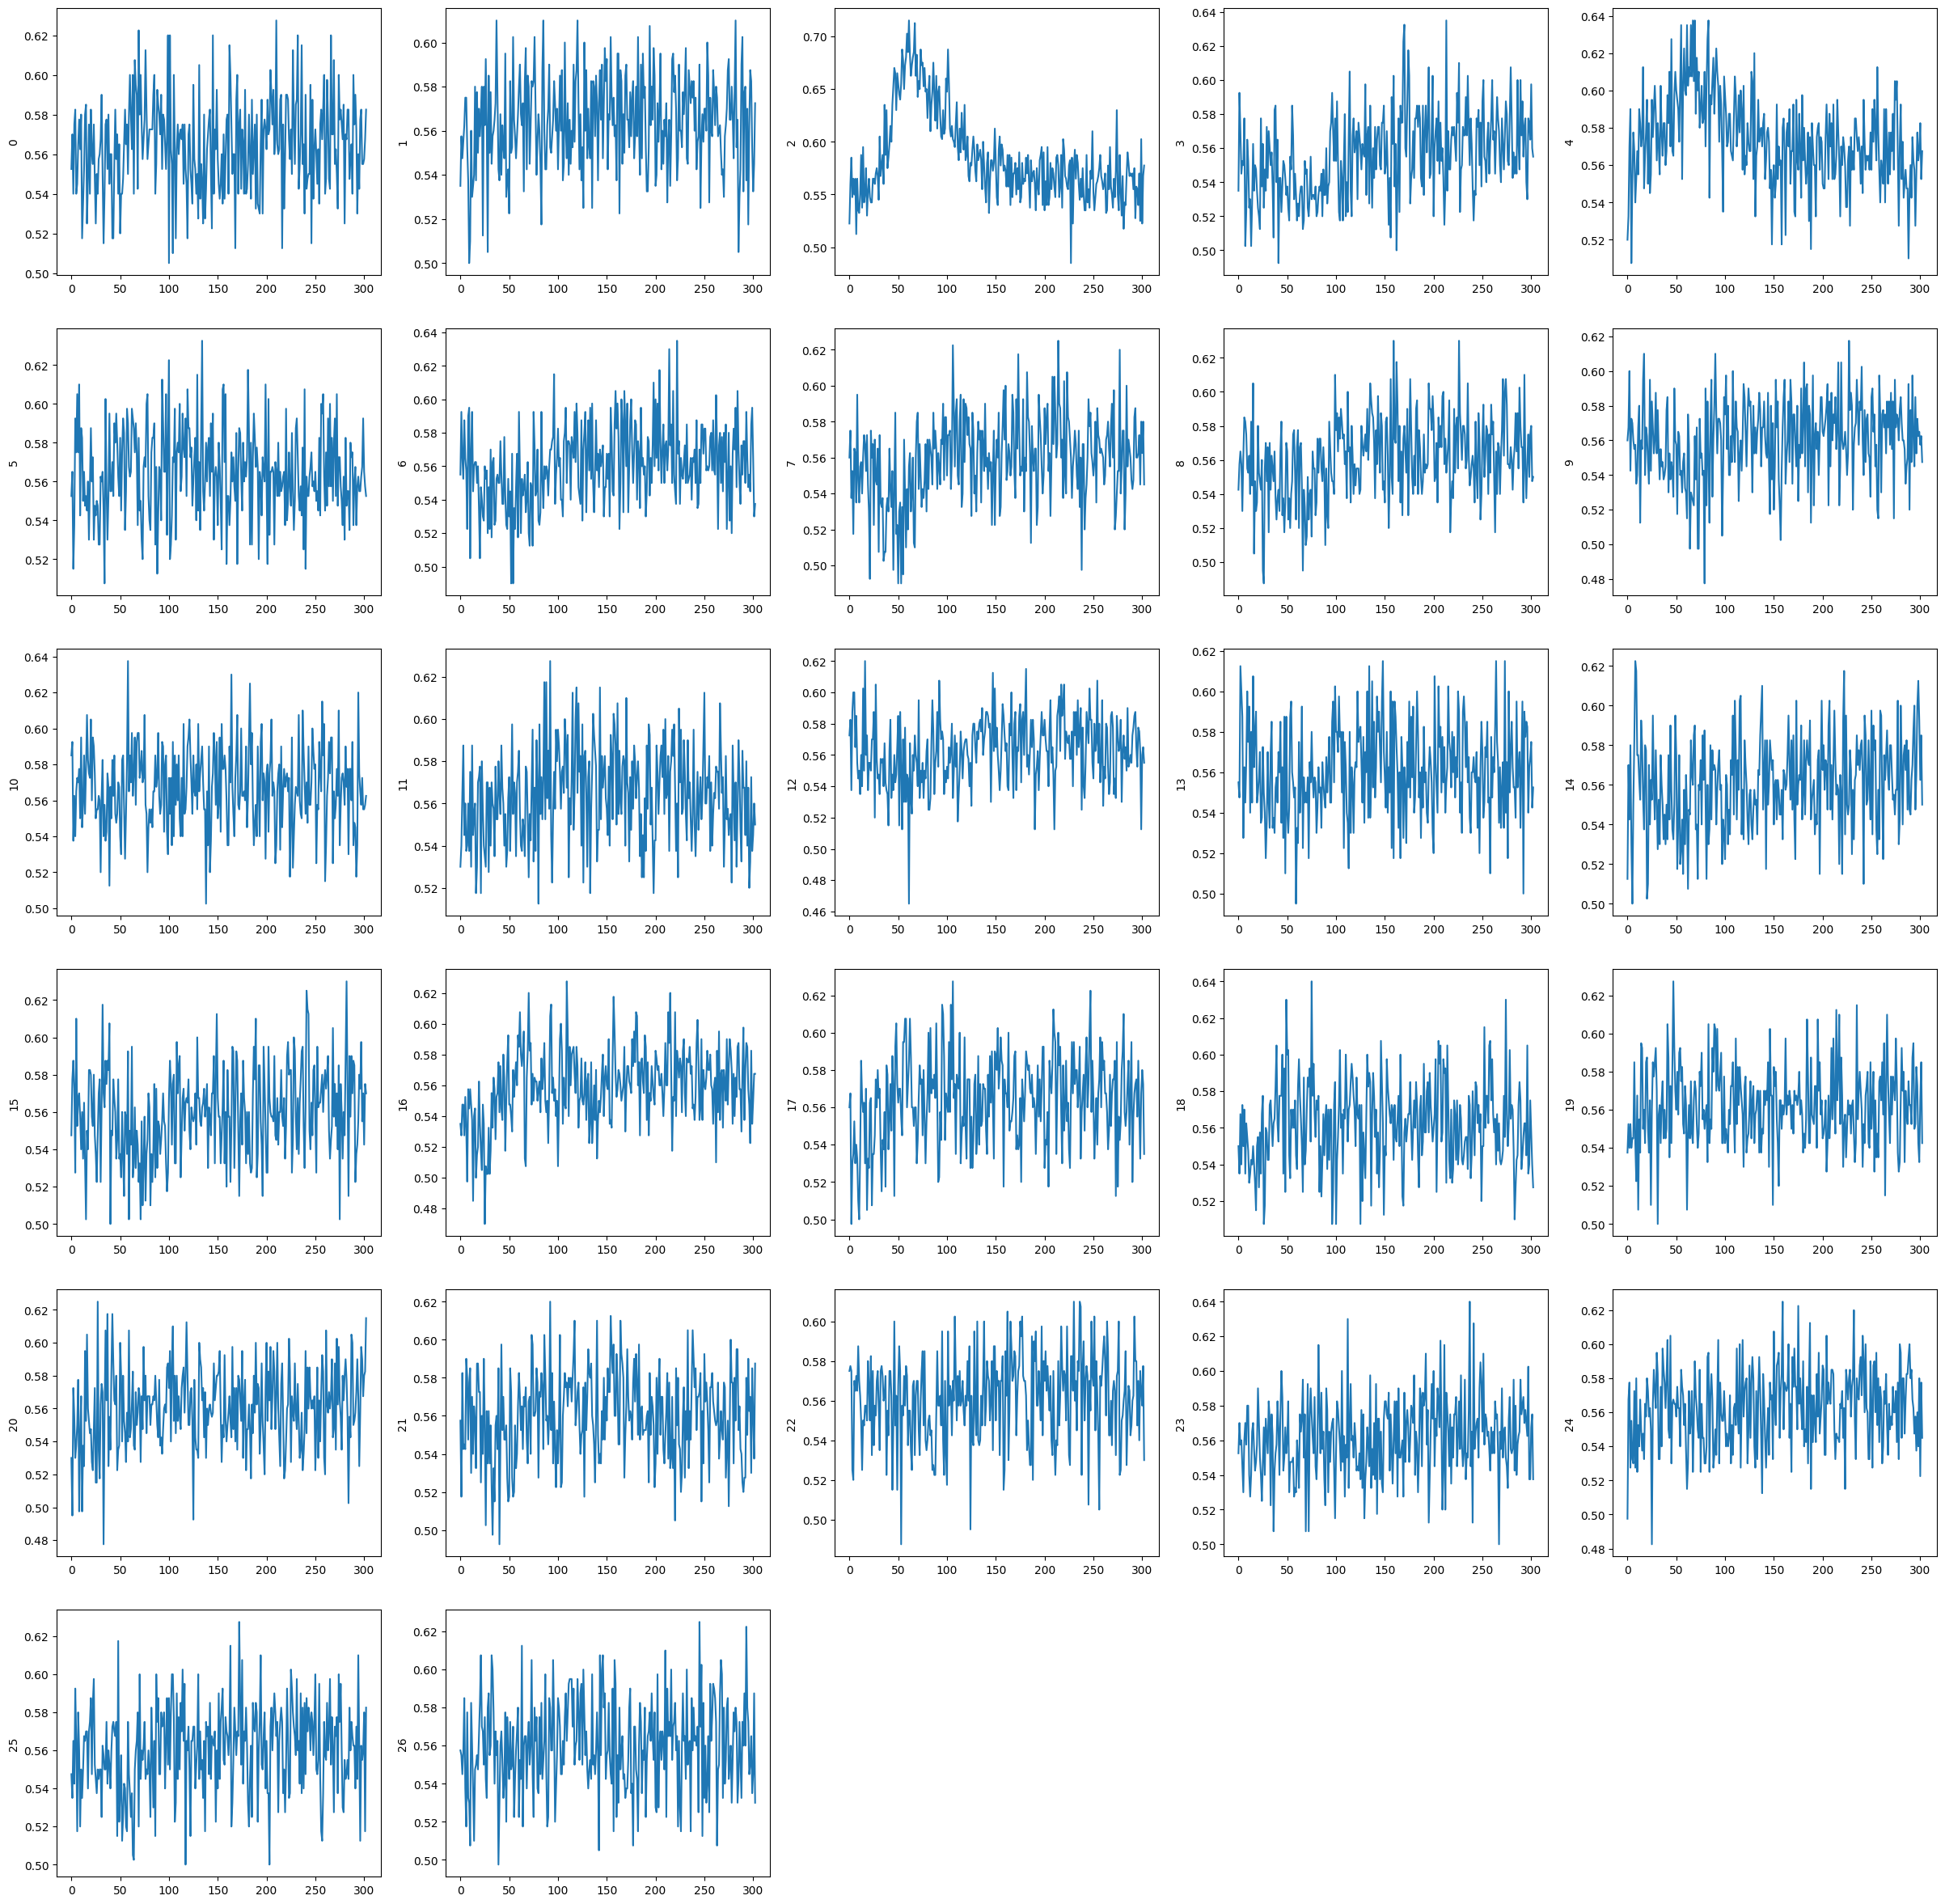

In [ ]:
plt.figure(figsize=(30, 30))
for i in range(27):
  plt.subplot(6, 5, i+1)
  sns.lineplot(df_trak_results.iloc[:, i])
plt.show()

In [ ]:
df_trak_results.describe()

0           1           2           3           4           5   \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.564464    0.563746    0.586155    0.555685    0.573812    0.564554   
std      0.023501    0.021175    0.042329    0.024646    0.024090    0.022780   
min      0.505000    0.500000    0.485000    0.492500    0.507500    0.507500   
25%      0.547500    0.547500    0.557500    0.537500    0.557500    0.550000   
50%      0.565000    0.562500    0.577500    0.552500    0.572500    0.565000   
75%      0.580000    0.580000    0.605000    0.572500    0.590000    0.580000   
max      0.627500    0.610000    0.715000    0.635000    0.637500    0.632500   

               6           7           8           9   ...          17  \
count  303.000000  303.000000  303.000000  303.000000  ...  303.000000   
mean     0.560586    0.558424    0.560957    0.560206  ...    0.563787   
std      0.023419    0.024060    0.023529    0.023419  ...    0.023785   
min      0.490000    0.490000    0.487500    0.477500  ...    0.497500   
25%      0.546250    0.542500    0.545000    0.545000  ...    0.547500   
50%      0.560000    0.560000    0.562500    0.562500  ...    0.565000   
75%      0.575000    0.575000    0.577500    0.577500  ...    0.580000   
max      0.635000    0.625000    0.630000    0.617500  ...    0.627500   

               18          19          20          21          22          23  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.561790    0.562071    0.560561    0.560041    0.561106    0.561609   
std      0.023147    0.020644    0.024437    0.023151    0.022158    0.022462   
min      0.507500    0.500000    0.477500    0.492500    0.487500    0.500000   
25%      0.545000    0.547500    0.545000    0.545000    0.547500    0.547500   
50%      0.562500    0.562500    0.560000    0.560000    0.562500    0.562500   
75%      0.575000    0.575000    0.578750    0.577500    0.575000    0.575000   
max      0.640000    0.627500    0.625000    0.620000    0.610000    0.640000   

               24          25          26  
count  303.000000  303.000000  303.000000  
mean     0.562360    0.560264    0.560223  
std      0.022859    0.023110    0.023992  
min      0.482500    0.500000    0.497500  
25%      0.545000    0.545000    0.545000  
50%      0.565000    0.562500    0.560000  
75%      0.577500    0.575000    0.577500  
max      0.625000    0.627500    0.625000  

[8 rows x 27 columns]

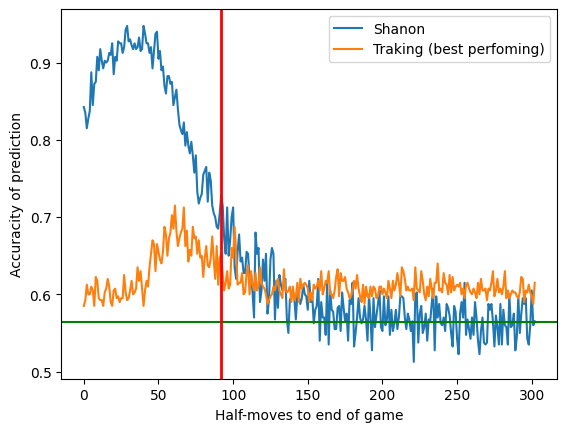

In [ ]:
sns.lineplot(results_shanon, label = 'Shanon')
sns.lineplot(df_trak_results.max(axis=1), label = 'Traking (best perfoming)')
plt.axhline(persent_white_win, label = 'Avg_guess', color = 'g')
plt.axvline(x=avg_moves_number, linewidth=2, color='r')
plt.xlabel('Half-moves to end of game')
plt.ylabel('Accuracity of prediction')
plt.show()


In [113]:
from sklearn.neighbors import KNeighborsClassifier

df_trak_results = pd.DataFrame(columns = range(27))
# model = LogisticRegression()
model = KNeighborsClassifier(n_neighbors=10, n_jobs=-1)
for i in range(max_moves_number-1, 1, -1):
    vector = []
    for j in range(27):
        if i >= 10:
          df_model = pd.DataFrame(df_features_traking.iloc[:, (i-10)*27+j:i*27:27])
          X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(df_model, df_features_traking[target], test_size=0.2)
          model.fit(X_train_pos, y_train_pos)
          y_predicted = model.predict(X_test_pos)
        else:
          df_model = pd.DataFrame(df_features_traking.iloc[:, 0+j:i*27:27])
          X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(df_model, df_features_traking[target], test_size=0.2)
          model.fit(X_train_pos, y_train_pos)
          y_predicted = model.predict(X_test_pos)
        vector.append(accuracy_score(y_test_pos, y_predicted))
    df_trak_results.loc[max_moves_number-1-i] = vector
df_trak_results

0       1       2       3       4       5       6       7       8   \
0    0.4950  0.5200  0.5500  0.5450  0.5225  0.4675  0.4950  0.4850  0.4850   
1    0.5225  0.5250  0.5425  0.5200  0.4800  0.5175  0.5325  0.5150  0.5175   
2    0.5000  0.5500  0.5425  0.5150  0.4800  0.5075  0.4950  0.5350  0.5300   
3    0.4875  0.5450  0.4975  0.5375  0.5225  0.4700  0.4925  0.5025  0.5025   
4    0.5400  0.5375  0.5175  0.5425  0.5350  0.5025  0.5025  0.4775  0.5225   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
298  0.4175  0.5175  0.4300  0.4475  0.4175  0.5725  0.5675  0.4100  0.4175   
299  0.5950  0.4875  0.4475  0.5450  0.5675  0.4250  0.5525  0.5875  0.5850   
300  0.4075  0.4625  0.4550  0.4200  0.5475  0.5925  0.5500  0.4200  0.4025   
301  0.4175  0.4675  0.4500  0.5800  0.5950  0.5725  0.5950  0.5625  0.4025   
302  0.6225  0.5750  0.4500  0.4400  0.4150  0.5975  0.5375  0.5550  0.5725   

         9   ...      17      18      19      20      21      22      23  \
0    0.5075  ...  0.5100  0.4975  0.5150  0.4875  0.4725  0.4925  0.5300   
1    0.5225  ...  0.5200  0.5350  0.4150  0.5400  0.5350  0.5300  0.5425   
2    0.5100  ...  0.5100  0.5025  0.4400  0.5200  0.5175  0.5325  0.4950   
3    0.5225  ...  0.4700  0.5075  0.4750  0.5025  0.4875  0.4875  0.5300   
4    0.5450  ...  0.5550  0.5050  0.5600  0.5125  0.5000  0.4975  0.4750   
..      ...  ...     ...     ...     ...     ...     ...     ...     ...   
298  0.5375  ...  0.5675  0.6175  0.4325  0.4675  0.5900  0.5600  0.5475   
299  0.4650  ...  0.5700  0.5550  0.5625  0.5900  0.4300  0.5925  0.5875   
300  0.4350  ...  0.4575  0.5800  0.4100  0.5050  0.5825  0.4750  0.4200   
301  0.4300  ...  0.4500  0.5125  0.4000  0.4025  0.5500  0.4400  0.4500   
302  0.5475  ...  0.5700  0.5725  0.5700  0.5500  0.5775  0.5500  0.5875   

         24      25      26  
0    0.4875  0.5275  0.5425  
1    0.5125  0.5000  0.5200  
2    0.4975  0.5325  0.5600  
3    0.5050  0.5275  0.5125  
4    0.4650  0.5200  0.5350  
..      ...     ...     ...  
298  0.4125  0.5225  0.4200  
299  0.5600  0.5775  0.5800  
300  0.5825  0.5725  0.5875  
301  0.4025  0.4500  0.4525  
302  0.6125  0.4175  0.4200  

[303 rows x 27 columns]

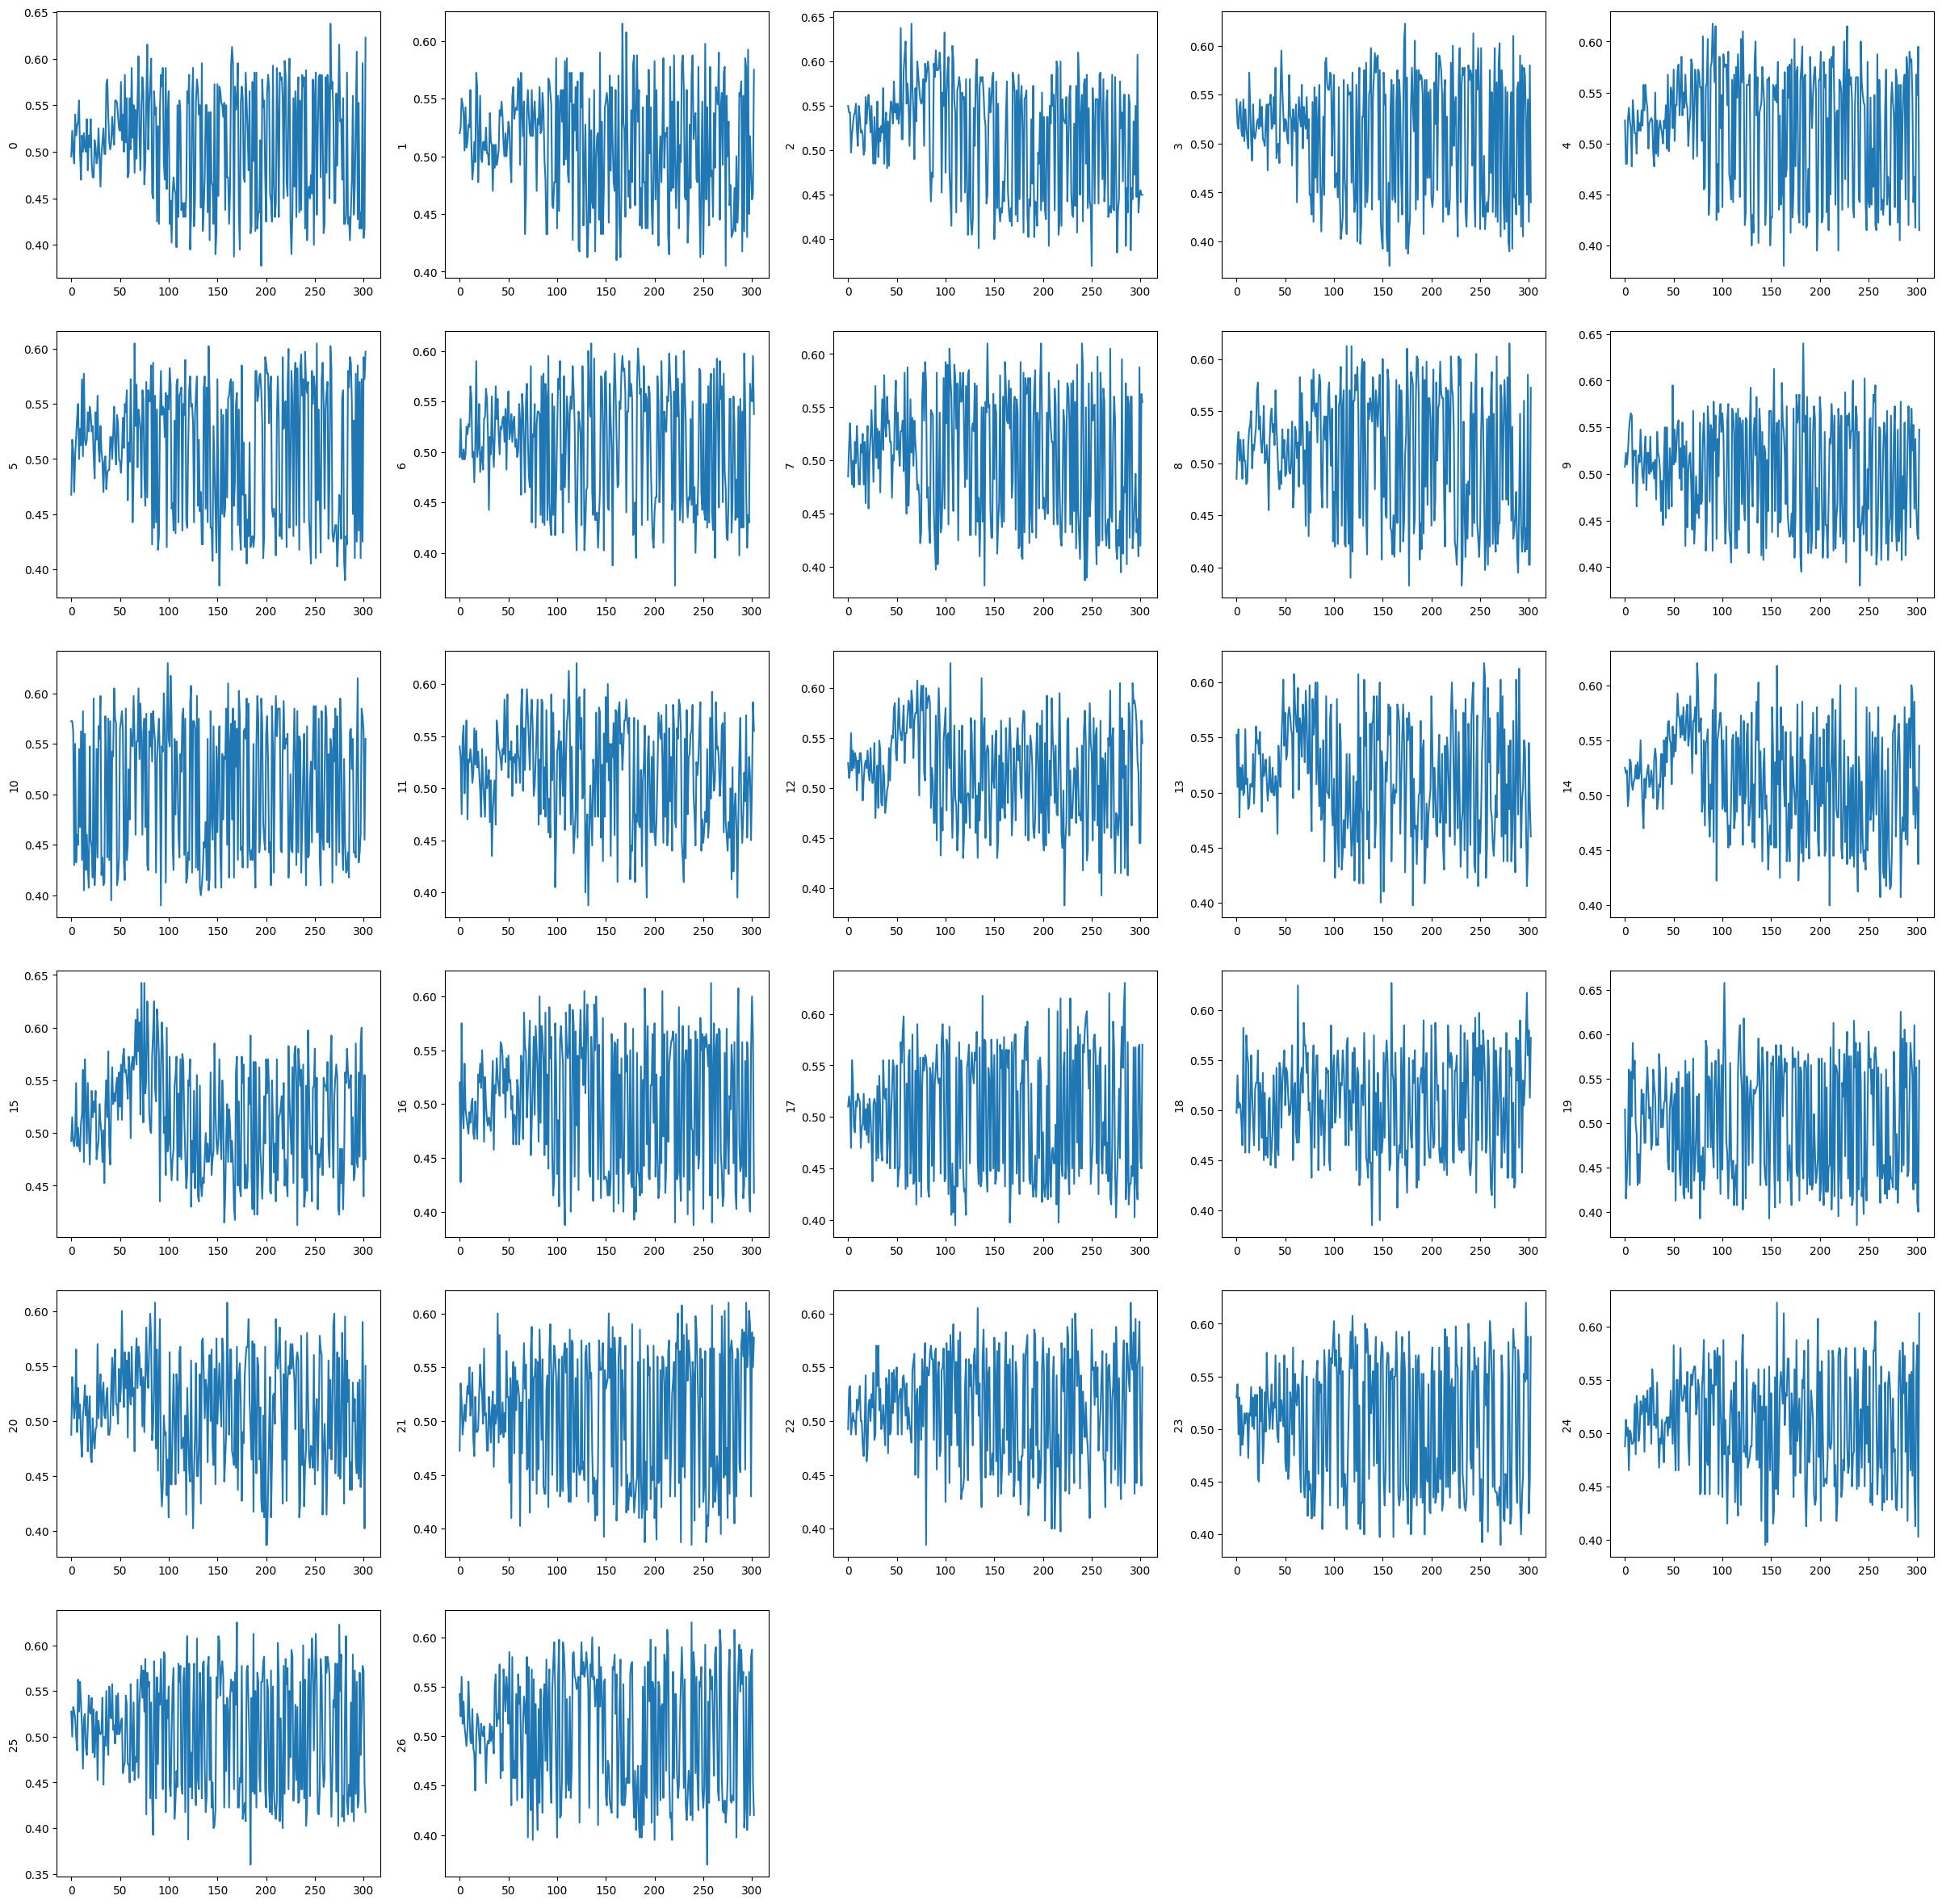

In [114]:
plt.figure(figsize=(30, 30))
for i in range(27):
  plt.subplot(6, 5, i+1)
  sns.lineplot(df_trak_results.iloc[:, i])
plt.show()

In [115]:
df_trak_results.describe()

0           1           2           3           4           5   \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.508111    0.509620    0.516147    0.508300    0.517863    0.509695   
std      0.061649    0.048596    0.063325    0.061629    0.058732    0.059225   
min      0.377500    0.405000    0.370000    0.375000    0.380000    0.385000   
25%      0.452500    0.473750    0.450000    0.447500    0.465000    0.451250   
50%      0.517500    0.512500    0.535000    0.525000    0.535000    0.522500   
75%      0.557500    0.547500    0.566250    0.560000    0.565000    0.561250   
max      0.637500    0.615000    0.642500    0.622500    0.617500    0.605000   

               6           7           8           9   ...          17  \
count  303.000000  303.000000  303.000000  303.000000  ...  303.000000   
mean     0.508020    0.504703    0.509439    0.503886  ...    0.502756   
std      0.057807    0.059610    0.060765    0.057050  ...    0.060374   
min      0.367500    0.382500    0.382500    0.380000  ...    0.395000   
25%      0.453750    0.448750    0.451250    0.450000  ...    0.445000   
50%      0.520000    0.517500    0.522500    0.517500  ...    0.510000   
75%      0.555000    0.555000    0.560000    0.553750  ...    0.557500   
max      0.607500    0.610000    0.615000    0.640000  ...    0.630000   

               18          19          20          21          22          23  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.507401    0.501766    0.508482    0.505520    0.511543    0.504488   
std      0.049266    0.064744    0.049156    0.060948    0.049358    0.060903   
min      0.385000    0.385000    0.387500    0.385000    0.385000    0.390000   
25%      0.462500    0.438750    0.467500    0.447500    0.472500    0.445000   
50%      0.510000    0.510000    0.512500    0.522500    0.520000    0.515000   
75%      0.545000    0.562500    0.548750    0.557500    0.552500    0.557500   
max      0.627500    0.657500    0.607500    0.610000    0.610000    0.620000   

               24          25          26  
count  303.000000  303.000000  303.000000  
mean     0.508738    0.505883    0.504373  
std      0.049098    0.063229    0.061562  
min      0.395000    0.360000    0.370000  
25%      0.472500    0.442500    0.446250  
50%      0.512500    0.520000    0.512500  
75%      0.546250    0.560000    0.560000  
max      0.622500    0.625000    0.615000  

[8 rows x 27 columns]

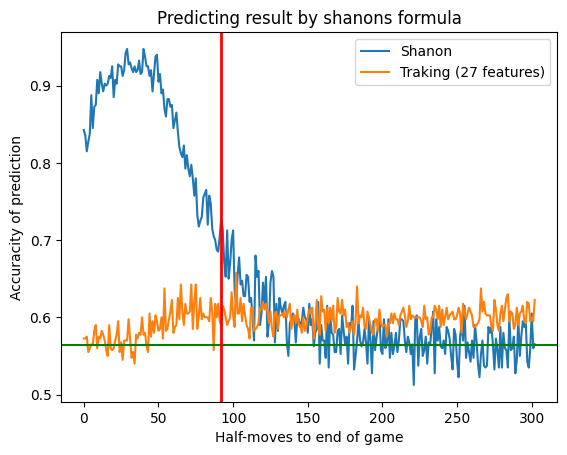

In [116]:
sns.lineplot(results_shanon, label = 'Shanon')
sns.lineplot(df_trak_results.max(axis=1), label = 'Traking (27 features)')
plt.axhline(persent_white_win, label = 'Avg_guess', color = 'g')
plt.axvline(x=avg_moves_number, linewidth=2, color='r')
plt.title('Predicting result by shanons formula')
plt.xlabel('Half-moves to end of game')
plt.ylabel('Accuracity of prediction')
plt.show()

In [117]:
from sklearn.neighbors import KNeighborsClassifier

df_trak_results = pd.DataFrame(columns = range(27))
# model = LogisticRegression()
model = KNeighborsClassifier(n_neighbors=25, n_jobs=-1)
for i in range(max_moves_number-1, 1, -1):
    vector = []
    for j in range(27):
        if i >= 20:
          df_model = pd.DataFrame(df_features_traking.iloc[:, (i-20)*27+j:i*27:27])
          X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(df_model, df_features_traking[target], test_size=0.2)
          model.fit(X_train_pos, y_train_pos)
          y_predicted = model.predict(X_test_pos)
        else:
          df_model = pd.DataFrame(df_features_traking.iloc[:, 0+j:i*27:27])
          X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(df_model, df_features_traking[target], test_size=0.2)
          model.fit(X_train_pos, y_train_pos)
          y_predicted = model.predict(X_test_pos)
        vector.append(accuracy_score(y_test_pos, y_predicted))
    df_trak_results.loc[max_moves_number-1-i] = vector
df_trak_results

0       1       2       3       4       5       6       7       8   \
0    0.5500  0.5625  0.5500  0.5325  0.5450  0.5000  0.5500  0.5200  0.5400   
1    0.5050  0.5000  0.5500  0.5450  0.5400  0.5550  0.5000  0.5200  0.5150   
2    0.5425  0.5475  0.5550  0.5275  0.5275  0.4825  0.5300  0.4950  0.5350   
3    0.5950  0.5200  0.5425  0.5600  0.5275  0.5425  0.5300  0.5575  0.5400   
4    0.5275  0.5450  0.5175  0.5300  0.5375  0.5225  0.5600  0.5125  0.5150   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
298  0.4225  0.5750  0.4375  0.5600  0.5675  0.4575  0.5400  0.4425  0.6000   
299  0.4150  0.4500  0.5850  0.5775  0.4575  0.5975  0.5925  0.5550  0.5425   
300  0.5675  0.5425  0.5450  0.5700  0.5825  0.5900  0.4250  0.4450  0.6025   
301  0.5375  0.5625  0.5525  0.5650  0.5750  0.5525  0.5525  0.5700  0.5600   
302  0.5850  0.5325  0.4125  0.5575  0.3850  0.5750  0.5700  0.5550  0.5525   

         9   ...      17      18      19      20      21      22      23  \
0    0.5850  ...  0.5500  0.5225  0.5550  0.5400  0.5725  0.5700  0.5450   
1    0.5375  ...  0.5575  0.5550  0.5650  0.5425  0.5325  0.5400  0.5550   
2    0.5300  ...  0.5750  0.5375  0.5425  0.5025  0.5625  0.5750  0.5475   
3    0.5675  ...  0.5775  0.5075  0.4750  0.5375  0.5400  0.5550  0.5375   
4    0.5525  ...  0.5400  0.5225  0.4700  0.5075  0.5300  0.5400  0.5475   
..      ...  ...     ...     ...     ...     ...     ...     ...     ...   
298  0.5550  ...  0.4725  0.4225  0.5825  0.5875  0.6000  0.4850  0.5725   
299  0.5575  ...  0.5325  0.5550  0.5750  0.5700  0.5850  0.5775  0.4075   
300  0.5125  ...  0.5325  0.4450  0.5625  0.5350  0.5975  0.5600  0.5700   
301  0.5450  ...  0.5775  0.5325  0.5700  0.5550  0.5325  0.5000  0.5650   
302  0.6200  ...  0.5400  0.5550  0.4425  0.5125  0.5625  0.5150  0.5425   

         24      25      26  
0    0.5825  0.5250  0.5600  
1    0.5150  0.5400  0.5900  
2    0.5200  0.5175  0.5325  
3    0.5025  0.4900  0.5450  
4    0.5450  0.5350  0.5200  
..      ...     ...     ...  
298  0.5575  0.5700  0.5725  
299  0.5500  0.4400  0.4475  
300  0.5575  0.5550  0.5825  
301  0.4550  0.5925  0.5600  
302  0.5600  0.5600  0.5700  

[303 rows x 27 columns]

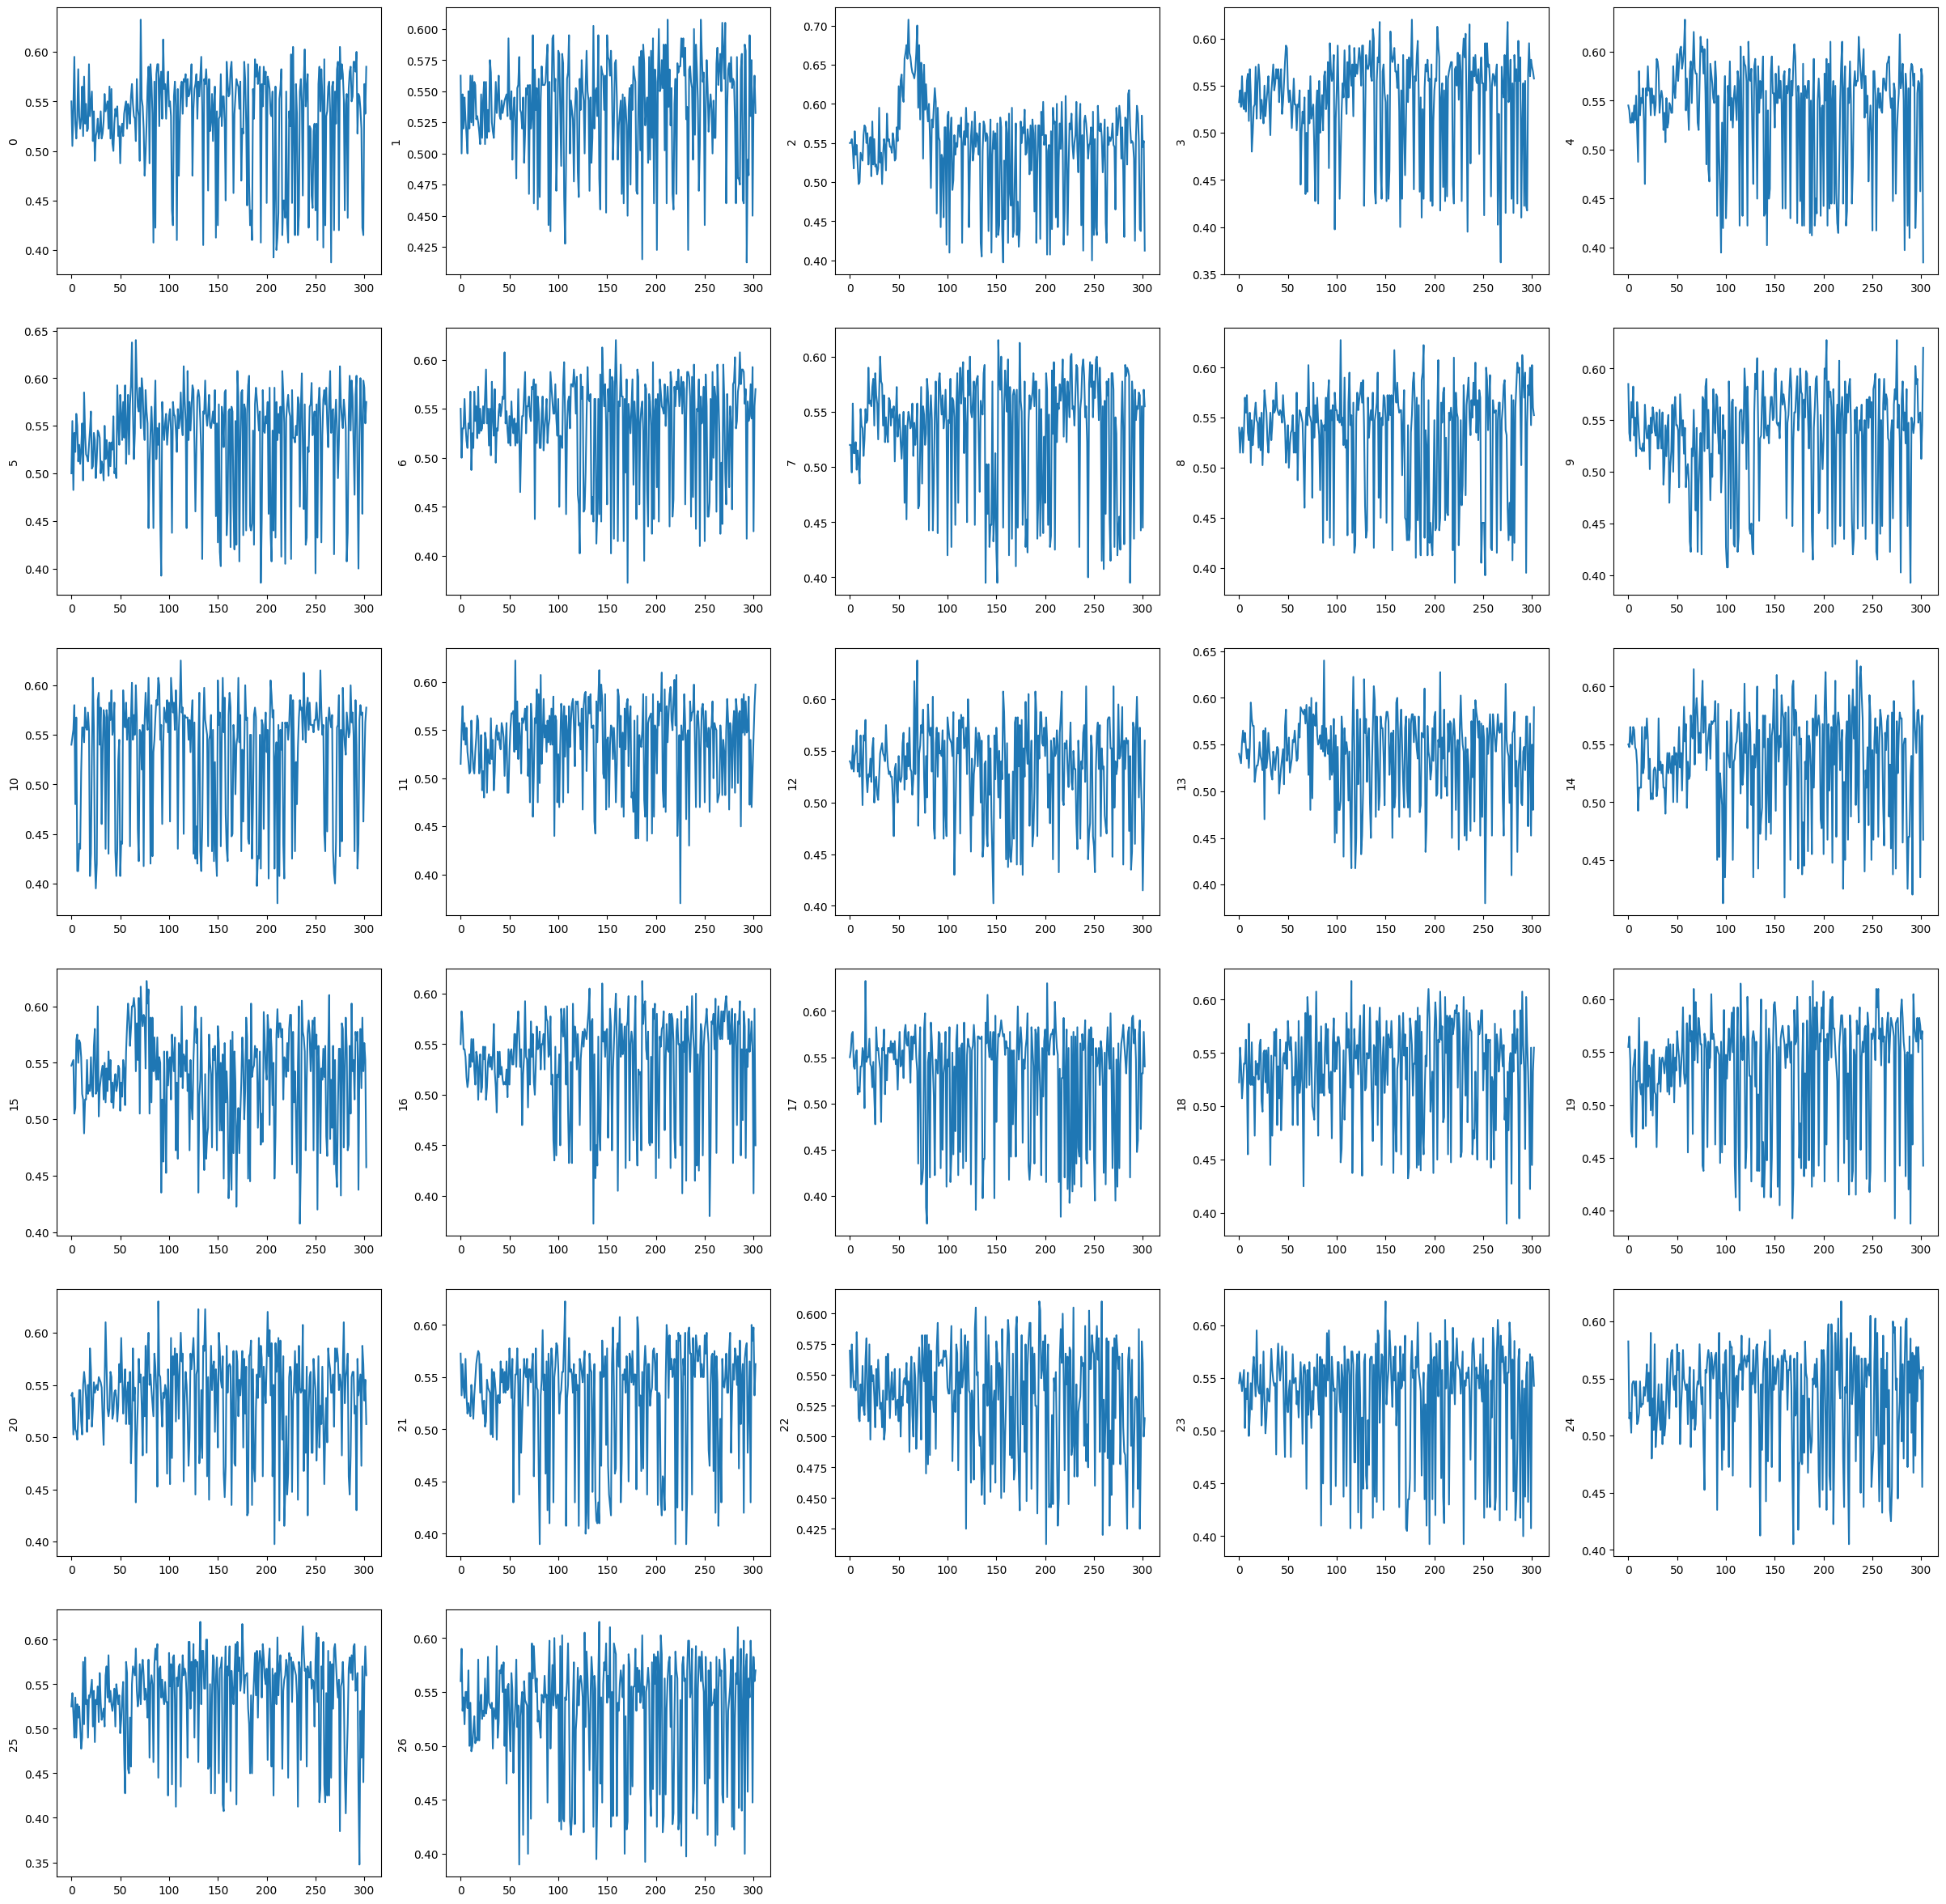

In [118]:
plt.figure(figsize=(30, 30))
for i in range(27):
  plt.subplot(6, 5, i+1)
  sns.lineplot(df_trak_results.iloc[:, i])
plt.show()

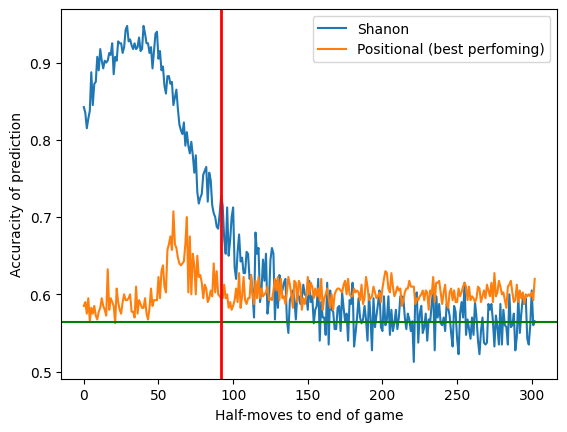

In [119]:
sns.lineplot(results_shanon, label = 'Shanon')
sns.lineplot(df_trak_results.max(axis=1), label = 'Positional (best perfoming)')
plt.axhline(persent_white_win, label = 'Avg_guess', color = 'g')
plt.axvline(x=avg_moves_number, linewidth=2, color='r')
plt.title('')
plt.xlabel('Half-moves to end of game')
plt.ylabel('Accuracity of prediction')
plt.show()